In [1]:
import numpy as np
import pandas as pd

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense



INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
X, y = iris.values[:, :-1], iris.values[:, -1]

In [9]:
print(X.shape,y.shape)

(150, 4) (150,)


In [10]:
def create_one_hot_encoding(classes, shape):
    one_hot_encoding = np.zeros(shape)
    for i in range(0, len(one_hot_encoding)):
        one_hot_encoding[i][int(classes[i])] = 1
    return one_hot_encoding

In [11]:
y1 = create_one_hot_encoding(y, (len(y), len(np.unique(y))))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y1,random_state=15, test_size=0.33)

In [91]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(100, 4) (100, 3) (50, 4) (50, 3)


In [92]:
n_features = X.shape[1]

In [93]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [94]:
epochs=100
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test, y_test),verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 80ms/step - loss: 4.5623 - accuracy: 0.3435 - val_loss: 4.1331 - val_accuracy: 0.3400
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 4.1783 - accuracy: 0.3247 - val_loss: 3.6534 - val_accuracy: 0.3400
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 3.5671 - accuracy: 0.3268 - val_loss: 3.1493 - val_accuracy: 0.3400
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 3.0836 - accuracy: 0.3289 - val_loss: 2.6254 - val_accuracy: 0.3400
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 2.5464 - accuracy: 0.3383 - val_loss: 2.1500 - val_accuracy: 0.3400
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9874 - accuracy: 0.3782 - val_loss: 1.7845 - val_accuracy: 0.3800
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6902 - accuracy: 0.4877 - val_loss: 1.5550 - val_accuracy: 0.5000
Epoch 8/100
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.3282 - accuracy: 0.9354 - val_loss: 0.3349 - val_accuracy: 0.9200
Epoch 60/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3077 - accuracy: 0.9416 - val_loss: 0.3327 - val_accuracy: 0.9200
Epoch 61/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3136 - accuracy: 0.9322 - val_loss: 0.3239 - val_accuracy: 0.9200
Epoch 62/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3100 - accuracy: 0.9352 - val_loss: 0.3156 - val_accuracy: 0.9400
Epoch 63/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2922 - accuracy: 0.9477 - val_loss: 0.3108 - val_accuracy: 0.9400
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3032 - accuracy: 0.9600 - val_loss: 0.3070 - val_accuracy: 0.9400
Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3101 - accuracy: 0.9538 - val_loss: 0.3037 - val_accuracy: 0.9800
Epoch 66/100
4/4 [===============

In [95]:
from  matplotlib import pyplot as plt
import seaborn as sns

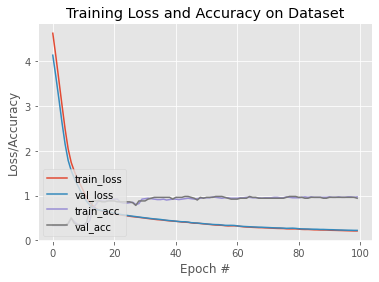

In [96]:
N = epochs # No. epochs 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

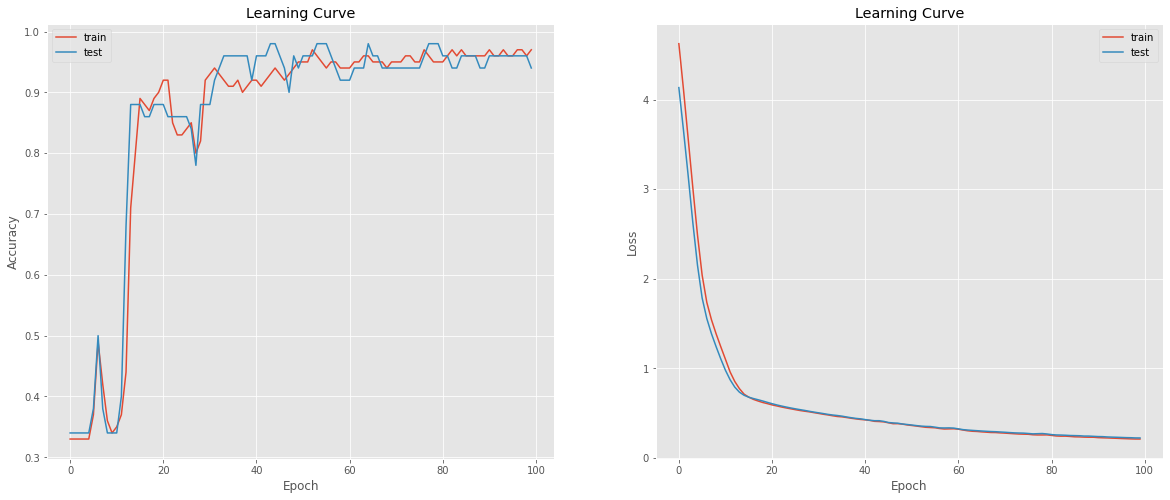

In [97]:
keys=['accuracy', 'loss']
plt.figure(figsize=(20,8))
for i, key in enumerate(keys):
    plt.subplot(1, 2, i + 1)
    sns.lineplot(x = history.epoch, y = history.history[key])
    sns.lineplot(x = history.epoch, y = history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
#         plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
plt.show()

In [98]:
model.metrics_names

['loss', 'accuracy']

In [99]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.2225 - accuracy: 0.9400


[0.22248390316963196, 0.9399999976158142]

In [100]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(X_test)

C:\Users\mural\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [101]:
df = pd.DataFrame(y_test)
new_df = df.idxmax(axis=1)

In [102]:
print(classification_report(new_df,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.88      0.91        17
           2       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

